### 2d. Acceleration components ###

**Parametric curve, tangential and normal components of acceleration**

**Problem.** A particle moves along the curve $\vec{r} = (t^3-4t)\vec{i} + (t^2+4t)\vec{j} + (8t^2-3t^3)\vec{k}.$ Find the magnitudes of the tangential and normal components of its acceleration when t=2. [Sch56/66]

**Solution.** Velocity is
$$\vec{v}= \frac{d\vec{r}}{dt} $$ and acceleration  $$\vec{a}= \frac{d\vec{v}}{dt} =  \frac{d^2\vec{r}}{dt^2}. $$
The components of $\vec{a}$ are obtained by projecting it onto the unit tangent $\vec{T}$  and the unit principal normal $\vec{N}$. Projections are obtained by dot products
 $\vec{a}\cdot{}\vec{T}$ and $\vec{a}\cdot{}\vec{N}$.
 
 The unit vectors comes from $$\vec{T} = \frac{d\vec{r}/dt}{|d\vec{r}/dt|} $$ and
 $$\vec{N} = \frac{1}{\kappa}\vec{\frac{dT}{ds}} = \frac{1}{\kappa}\frac{d\vec{T}/dt}{|d\vec{r}/dt|},$$ where $\kappa$ is *curvature* $$\kappa = |\vec{\frac{dT}{ds}}|.$$


In [1]:
# INIT
from sympy import *
from sympy.vector import CoordSys3D
t = symbols('t')                                # t is the parameter for the curve
C = CoordSys3D('C')                             # Defines a standard coordinate system

# INPUT
P = [(t**3-4*t), (t**2+4*t), (8*t**2-3*t**3)]   # Parametric curve.  
t0 = 2                                          # Fixed parameter value

# CALCULATE
# Expressions of vectors r, v and a 
# (The 's' appearing in the code is arc lenght parameter we don't need explicitly)
r = P[0]*C.i + P[1]*C.j + P[2]*C.k              # Position vector the curve in CoordSys C.
v = diff(r, t)                                  # dr/dt gives the tangential velocity v
a = diff(v, t)                                  # dv/dt = d^2/dr^2 gives the acceleration a 
norm_v = sqrt(v.dot(v))                         # norm_v = |dr/dt|
T = v/norm_v                                    # T = dr/ds = (dr/dt)/(ds/dt) = (dr/dt)(|dr/dt|)
dT_dt = diff(T, t)                      
dT_ds = dT_dt/norm_v                            # dT/ds =(dT/dt)/(ds/dt) = (dT/dt)/|dr/dt|
k = sqrt(dT_ds.dot(dT_ds))                      # Curvature k = |dT/ds|
N = (1/k)*dT_ds                                 # Principal normal

# At fixed point where t=t0
def at_t0(expr, t0):                            # Evaluates the expression at the point where t=t0
    return expr.evalf(subs={t: t0 })

P0 = [round(at_t0(P[0], t0)),round(at_t0(P[1], t0)),round(at_t0(P[2], t0))]
r0 = at_t0(r, t0)
v0 = at_t0(v, t0)
norm_v0 = at_t0(norm_v, t0)
T0 = at_t0(T, t0)
a0 = at_t0(a, t0)
dT_dt0= at_t0(dT_dt, t0)
dT_ds0= at_t0(dT_ds, t0)
k0 = at_t0(k, t0)
N0 = at_t0(N, t0)

# Components of acceleration at point where t = t0
a0_T0 = round(a0.dot(T0), 2)  # Tangential component, the projection of a0 to the tangent T0
a0_N0 = round(a0.dot(N0), 2)  # Principal normal component

# Printing OUTPUT 
print('At point',P0, 'where t =',t0,' the tangential component of the acceleration is',   a0_T0, 'and')
print('principal normal component is',   a0_N0,'.')


At point [0, 12, 8] where t = 2  the tangential component of the acceleration is 16.0000000000000 and
principal normal component is 17.09 .


In [2]:
# Plotting OUTPUT     Needs input on line 20 and 27    !!!
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

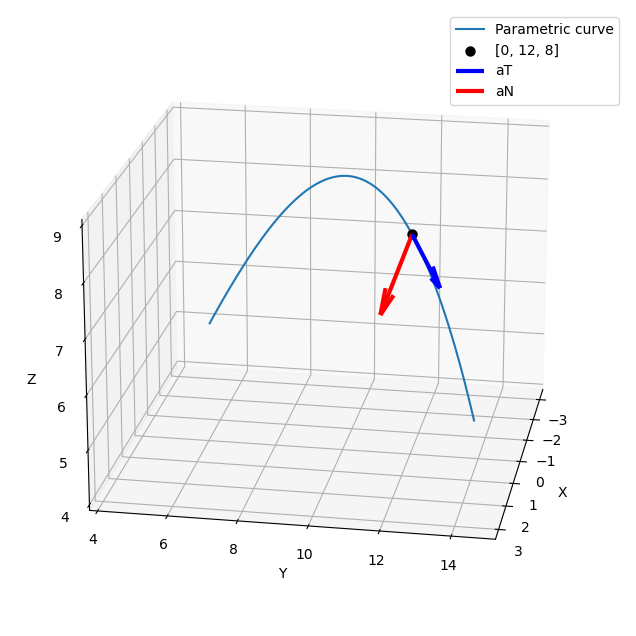

At point [0, 12, 8] where t = 2  the tangential component of the acceleration is 16.0000000000000 and
principal normal component is 17.09 .


In [3]:
# (<< Need to be splitted to the previous cell         !!!)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection = '3d')     # Creates a 3d coordinate system
ax.view_init(elev=20, azim=10)              # Viewing angle to the coordinate system

# Axis limitations 
#ax.set_xlim3d([-2.5, 2.5])        
ax.set_ylim3d([4, 15])
ax.set_zlim3d([4, 9])

# Axis markings
ax.set_xlabel('X')                 
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Prepare a list of parameter values for curve plotting
t = np.linspace(1, 2.3, 100)                      # from, to, number of values

 # COPY FROM INPUT HERE!!!:
P = [(t**3-4*t), (t**2+4*t), (8*t**2-3*t**3)]     # Points on curve                          
ax.plot(P[0], P[1], P[2], label='Parametric curve')

# Fixed point on the curve where parameter t = t0
t = t0                                            # Fixed parameter value given in input. 

# COPY FROM INPUT HERE!!!:
P = [round((t**3-4*t), 2), round((t**2+4*t), 2), round((8*t**2-3*t**3), 2)] #  Points on curve  

ax.scatter(P[0], P[1], P[2], color='k', linewidths=3, label = P)  # Point on the curve
#ax.scatter(0,0,0, color='y', linewidths=2, label = 'Origin')     # Origin

# Extract scalar components from T0, N0 for quiver plotting
P1 = C.origin.locate_new('P1', T0)
V1 = list(P1.express_coordinates(C))
P2 = C.origin.locate_new('P2', N0)
V2 = list(P2.express_coordinates(C))

# Plotting acceleration component vectors.  (start point, components scaled to 1/10 )
quiver1 = ax.quiver(P[0], P[1], P[2], (a0_T0/10)*V1[0],(a0_T0/10)*V1[1],(a0_N0/10)*V1[2],  color='b', linewidths=3, label = 'aT')
quiver2 = ax.quiver(P[0], P[1], P[2], (a0_N0/10)*V2[0],(a0_N0/10)*V2[1],(a0_N0/10)*V2[2],  color='r', linewidths=3, label = 'aN')

ax.legend()
plt.show()
print('At point',P0, 'where t =',t0,' the tangential component of the acceleration is',   a0_T0, 'and')
print('principal normal component is',   a0_N0,'.')

In [4]:
# Test printing

print('r:', r)
print('v:', v)
print('a:', a)

print('P0:', P0)
print('r0:', r0)
print('v0:', v0)
print('norm_v0:', norm_v0)
print('T0:', T0)
print('Unity check T0:', T0.dot(T0))       
print('a0:', a0)
print('dT_dt0:', dT_dt0)
print('dT_ds0:', dT_ds0)
print('k0:', k0)
print('N0:', N0)
print('Unity check T0:', T0.dot(T0)) 
print('Unity check N0:', N0.dot(N0)) 
print('Perpendicularity check T0, N0:', T0.dot(N0))

r: (t**3 - 4*t)*C.i + (t**2 + 4*t)*C.j + (-3*t**3 + 8*t**2)*C.k
v: (3*t**2 - 4)*C.i + (2*t + 4)*C.j + (-9*t**2 + 16*t)*C.k
a: 6*t*C.i + 2*C.j + (16 - 18*t)*C.k
P0: [0, 12, 8]
r0: (0.e-124)*C.i + 12.0*C.j + 8.0*C.k
v0: 8.0*C.i + 8.0*C.j + (-4.0)*C.k
norm_v0: 12.0000000000000
T0: 0.666666666666667*C.i + 0.666666666666667*C.j + (-0.333333333333333)*C.k
Unity check T0: 1.00000000000000
a0: 12.0*C.i + 2.0*C.j + (-20.0)*C.k
dT_dt0: 0.111111111111111*C.i + (-0.722222222222222)*C.j + (-1.22222222222222)*C.k
dT_ds0: 0.00925925925925926*C.i + (-0.0601851851851852)*C.j + (-0.101851851851852)*C.k
k0: 0.118666718684966
N0: 0.078027431464087*C.i + (-0.507178304516566)*C.j + (-0.858301746104957)*C.k
Unity check T0: 1.00000000000000
Unity check N0: 1.00000000000000
Perpendicularity check T0, N0: 0
